# Basics of cluster analysis

In this notebook we explore how to include categorical data into a clustering algorithm

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [2]:
# Load the country clusters data
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
# Check out the data manually 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [4]:
# Create a copy of the original dataset
data_mapped = data.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it 
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [14]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data_mapped.iloc[:,1:4]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [15]:
# Check if we worked correctly
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [16]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [17]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

There are many ways to do this part, we found this to be the most illustrative one

In [18]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [19]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


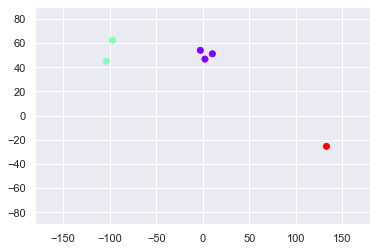

In [20]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()